In [13]:
import tensorflow as tf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from utils import plot_results, df_augmentation
tf.__version__

'2.0.0'

In [14]:
input_files = {
    'circle' : '../data/tiny/circle_25/input.txt',
    'gauss' : '../data/tiny/gauss_25/input.txt',
    'spiral' : '../data/tiny/spiral_25/input.txt',
    'xor' : '../data/tiny/xor_25/input.txt'
}

<div class="row">
  <div class="column">
      <p>circle</p>
    <img src="../data/tiny/circle_25/images/0.png" style="width:10%">
     
  </div>
  <div class="column">
      <p>gauss</p>
    <img src="../data/tiny/gauss_25/images/20.png" style="width:10%">
    
  </div>
  <div class="column">
      <p>spiral</p>
    <img src="../data/tiny/spiral_25/images/30.png" style="width:10%">
    
  </div>
   <div class="column">
       <p>spiral</p>
    <img src="../data/tiny/xor_25/images/0.png" style="width:10%">
    
  </div>
</div>


## Seleccionar el dataset

In [15]:
selected_dataset = 'circle'

## Seleccionar features

In [16]:
#Choose between: 'X1','X2', 'X1Squared', 'X2Squared', 'X1X2', 'sinX1', 'sinX2'
features = ['X1','X2', 'X1Squared', 'X2Squared', 'X1X2', 'sinX1', 'sinX2']

## Load Data

In [17]:
df = pd.read_csv(input_files[selected_dataset],sep='\t',usecols=['X1','X2','label'])
df = df_augmentation(df.X1.values,df.X2.values,features,df)
df['label'] = df['label'].apply(lambda x : 0 if x == -1 else x)
df.head()

,X1,X2,label,X1Squared,X2Squared,X1X2,sinX1,sinX2
0,4.398175,0.506726,0,19.343945,0.256772,2.228671,-0.951040,0.485318
1,0.357361,0.547110,1,0.127707,0.299329,0.195516,0.349803,0.520221
2,1.418880,-0.969543,1,2.013220,0.940013,-1.375664,0.988483,-0.824627
3,0.858990,-4.193147,0,0.737863,17.582478,-3.601870,0.757183,0.868195
4,-0.251586,4.579884,0,0.063296,20.975335,-1.152235,-0.248940,-0.991234


## Define your architecture

In [18]:
from tensorflow import keras
from tensorflow.keras.layers import *
tf.keras.opti

dropout = 0.1

model = keras.Sequential()
model.add(Dense(2, input_shape=(len(features),), activation='relu'))
########start your layers here#########
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='relu'))
########end your layers here#########
model.add(Dense(1, activation='sigmoid'))


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 16        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3         
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


## Log into tensorboard

In [20]:
tensorboard_cbk = tf.keras.callbacks.TensorBoard(log_dir='gs:../gabrielmaldonado-c9a511f1-a41a-4281-8a58-5352026a6583/playground_mchitiva/{}'.format(str(datetime.datetime.now().time())))

## Compile the model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.03),
              metrics=['accuracy',
                       tf.keras.metrics.Precision()])

## Train your model

In [25]:
history = model.fit(x=df[features], y=df.label, 
                    epochs=200, 
                    batch_size=32, 
                    verbose=0, 
                    callbacks=[tensorboard_cbk])

## Plot metrics

In [26]:
history.history.keys()

dict_keys(['loss', 'precision_2', 'accuracy'])

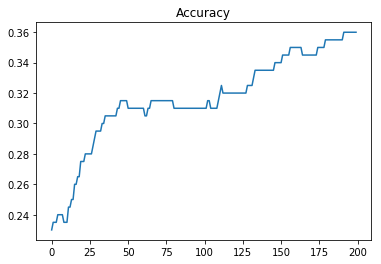

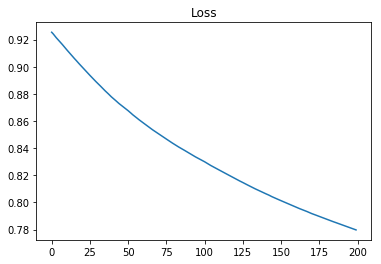

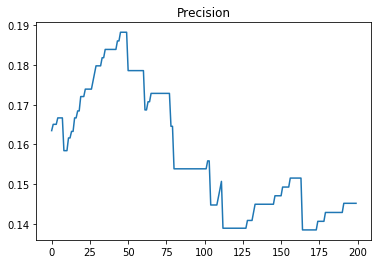

In [28]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.show()
plt.title('Loss')
plt.plot(history.history['loss'])
plt.show()
plt.title('Precision')
plt.plot(history.history['precision_2']);
plt.show()

## Plot Decision Boundaries

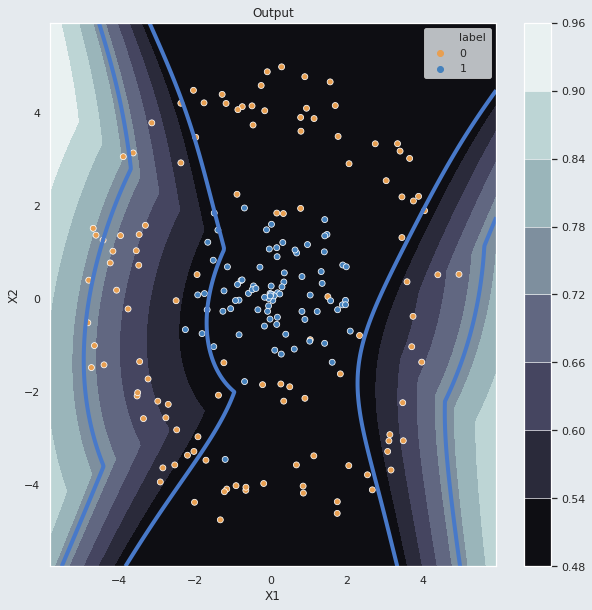

In [29]:
plot_results(df, model, features)

## Watch your Tensorboard
* Press
`Ctrl + Shift + L`

* Click on Tensorboard icon

<div class="row">
<img src="../images/tboard.png" width="10%" height="10%"/>
</div>

* enjoy!

